In [1]:
#%pip install opencv-python

In [2]:

import pandas as pd 


shape of the image: (3770, 5306, 3)


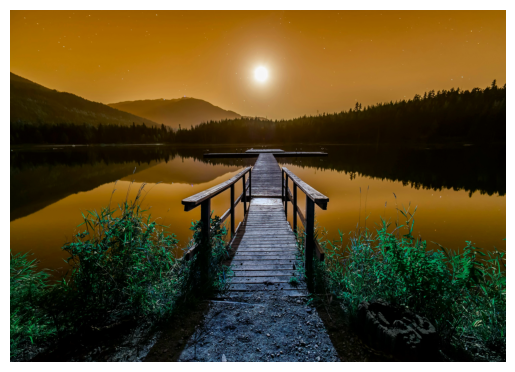

In [3]:

import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 

img = cv.imread("../img/img02.jpg")

print(f"shape of the image: {img.shape}")
plt.axis("off")
plt.imshow(img)
plt.show()

In [4]:
import os 

# size of the current image: (in Byte/10^6 = MB )
img_size_in_bytes = os.path.getsize(filename="../img/img02.jpg") 
img_size_in_mb = img_size_in_bytes/1000000
print(f"size of current image: {img_size_in_mb:.2f} MB")


size of current image: 1.54 MB


In [5]:

print(f"dtype of each image value: {img[0][0][0].dtype}")

dtype of each image value: uint8


In [6]:
 
# image size In Memory: RGB
# opencv read function: uncompressed the size of image
size_of_each_item = img.dtype.itemsize
size = img.shape[0] * img.shape[1] * img.shape[2] * size_of_each_item / 1000000
print(f"Image size in memory RGB: {size:.2f} MB") 


Image size in memory RGB: 60.01 MB


Gray Scale image Shape: {gray_image.shape}


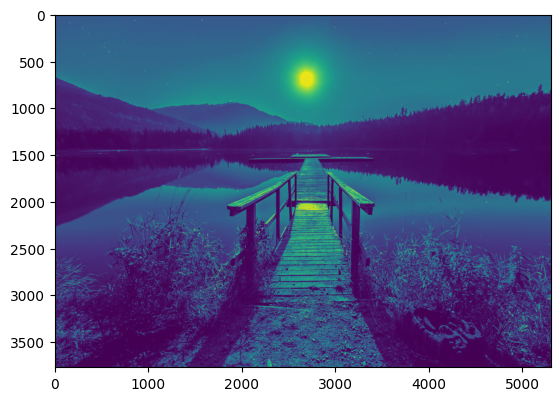

In [7]:

# covert the image into gray or black and white image: 
gray_image  = cv.cvtColor(src=img,code=cv.COLOR_BGR2GRAY)
print("Gray Scale image Shape: {gray_image.shape}")
plt.imshow(gray_image)


In [8]:

# size of gray_scale image in Memory: 
gray_scale_img = gray_image.shape[0] * gray_image.shape[1] * gray_image.dtype.itemsize
print(f"In Memory gray scale image size: {gray_scale_img/1000000:.2f} MB")


In Memory gray scale image size: 20.00 MB


In [9]:

# save the gray scale image in our disk:
cv.imwrite(filename="../img/gray_image.jpg",img=gray_image)


True

In [10]:

# save the orginal image in our disK:
cv.imwrite(filename="../img/img2_opencv_write.jpg",img=img)

True

In [11]:

# OpenCV perform automatic image compression while saving a file:
# okay. let's see that:
print(f"opencv gray image compression: {os.path.getsize(filename="../img/gray_image.jpg")/1000000} MB")
print(f"opencv rgb image compression: {os.path.getsize(filename="../img/img2_opencv_write.jpg")/1000000} MB")


opencv gray image compression: 2.717416 MB
opencv rgb image compression: 3.124158 MB



<br>
<br>

# `#Gray scale compression with LU decomposition:`

<br>
<br>

In [12]:

# P -> Permutation metrix
# P is used reconstruct the metrix
# A = P @ L @ U
from scipy.linalg import lu 
P,L,U = lu(gray_image)


In [13]:

# check the datatype:
gray_image[0][0].dtype

dtype('uint8')

In [14]:

P.dtype


dtype('float32')

(np.float64(-0.5), np.float64(5305.5), np.float64(3769.5), np.float64(-0.5))

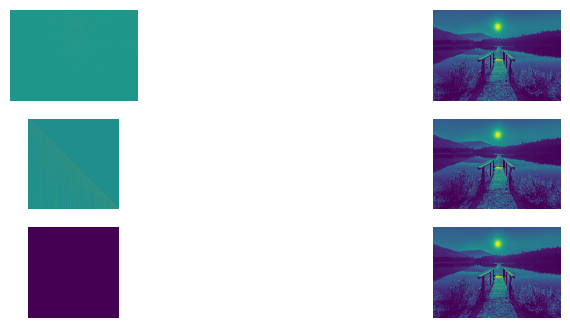

In [15]:

# show the compressed image: 
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(10,4))



ax[0][0].imshow(U)
ax[0][0].axis("off")
ax[0][1].imshow(gray_image)
ax[0][1].axis("off")

ax[1][0].imshow(L)
ax[1][0].axis("off")
ax[1][1].imshow(gray_image)
ax[1][1].axis("off")

ax[2][0].imshow(P)
ax[2][0].axis("off")
ax[2][1].imshow(gray_image)
ax[2][1].axis("off")


In [16]:

P.shape 

(3770, 3770)

In [17]:

# select top: m value from permution metrix:
m = 1000

P_m = P[:,:m]
L_m = L[:m,:m]
U_m = U[:m,:]



In [18]:

# image reconstruction:
img_recons = P_m @ L_m @ U_m 
print(img_recons)
"""
We perform: LU decompotion, 
to show the image with openCV we need to denormalize the image. 
"""
img_uint8 = np.clip(img_recons, 0, 255).astype(np.uint8)
print(img_uint8)


[[ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 ...
 [18.       17.       15.999999 ... 16.       15.999996 16.      ]
 [16.       19.       19.       ... 10.       12.       12.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]]
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [18 17 15 ... 16 15 16]
 [16 19 19 ... 10 12 12]
 [ 0  0  0 ...  0  0  0]]


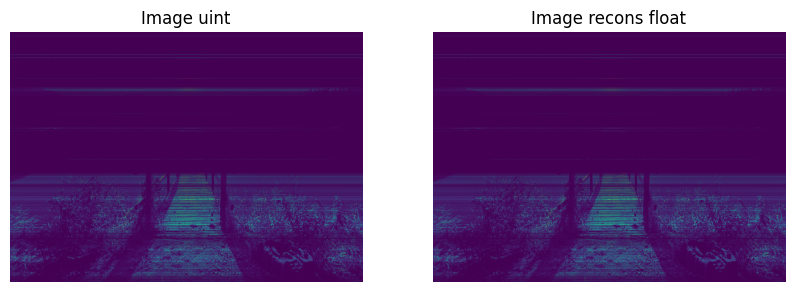

In [19]:

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

ax1.axis("off")
ax1.set_title("Image uint")
ax1.imshow(img_uint8)

ax2.set_title("Image recons float")
ax2.axis("off")
ax2.imshow(img_recons)


In [20]:

cv.imwrite(filename="../img/lu_decom.jpg",img=img_uint8)
os.path.getsize("../img/lu_decom.jpg")/1000000 

3.293149

<br>
<br>

# `# Image compression using  Single Value Decomosition(SVD):`

<br>
<br>

In [21]:

# rank of our gray_scale image matrix:
np.linalg.matrix_rank(gray_image)


np.int64(3770)

In [22]:

# perform single value decomposition:
U,S,V = np.linalg.svd(gray_image,full_matrices=False)
digonal_matrix = np.diag(S)


In [47]:

# select the Top: K value: 

k = 30

U_k = U[:, :k]
S_k = digonal_matrix[:k, :k]
V_k = V[:k, :]



In [48]:

# reconstruct the image:
compressed_image = U_k @ S_k @ V_k 

In [49]:

print("compressed image shape: {}".format(compressed_image.shape))
print("compressed_image: {}".format(compressed_image))


compressed image shape: (3770, 5306)
compressed_image: [[65.80268429 65.71172337 65.7099832  ... 74.22386161 73.66848112
  73.58439948]
 [65.77357636 65.68300239 65.67582773 ... 74.32386779 73.76253295
  73.68146036]
 [65.65862611 65.56981777 65.56027329 ... 74.4093128  73.85188071
  73.77329846]
 ...
 [24.37372043 27.46193181 29.46310983 ... 25.25461121 24.73574483
  25.34953376]
 [24.11932246 27.41565877 29.78568536 ... 24.82986504 24.15286935
  24.74375223]
 [22.80463294 26.11448975 28.61974732 ... 24.01823552 23.22537147
  23.76686315]]


In [50]:

svd_img_comp = np.clip(compressed_image,0,255).astype(np.uint8)


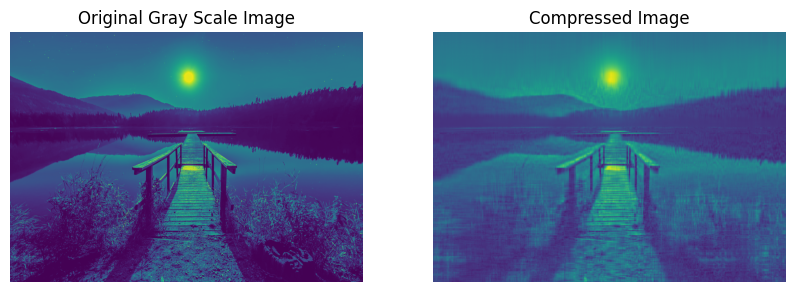

In [51]:

fg,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

ax1.axis("off")
ax1.set_title("Original Gray Scale Image")
ax1.imshow(gray_image)


ax2.axis("off")
ax2.set_title("Compressed Image")
ax2.imshow(compressed_image)
plt.show()

In [52]:


cv.imwrite(filename="../img/svd_compressed.jpg",img=svd_img_comp)

print(f"""\n\n Original Gray Scale Image Size: 
      {os.path.getsize("../img/gray_image.jpg")/1000000}""")

print(f"""\n\n Compressed Gray Scale Image Size: 
      {os.path.getsize("../img/svd_compressed.jpg")/1000000}""")




 Original Gray Scale Image Size: 
      2.717416


 Compressed Gray Scale Image Size: 
      2.633253
